# Example with Copper Mountain Model M5065 Vector Network Analyzer
This notebook was adapted from `qcodes_contrib_drivers` for Copper Mountain M5065. 

In [1]:
import qcodes as qc
from qcodes.dataset import (
    Measurement,
    load_or_create_experiment,
    plot_by_id,
)
from qcodes.station import Station

NoTagError: `git describe --long --dirty --always --tags '--match=v*'` could not find a tag


In [2]:
from qcodes.instrument_drivers.CopperMountain import CopperMountainM5065

## Connecting to device

- Install connection software S2VN, download here: https://coppermountaintech.com/download-free-vna-software-and-documentation/
- Run the software and go to System > Misc Setup > Network Remote Control Settings and turn on HiSLIP Server

In [ ]:
vna = CopperMountainM5065(
    name="M5065", address="GPIB::1::INSTR", pyvisa_sim_file="CopperMountain_M5065.yaml"
)

ValueError: ("could not convert string to float: 'ERROR\\n'", 'getting M50651_start')

In [4]:
# Let's look at all parameters
vna.print_readable_snapshot(update=True)

[M50651(CopperMountainM5065)] Error getting or interpreting *IDN?: ''
Traceback (most recent call last):
  File "C:\Users\v-tlemon\Documents\repos\Qcodes\src\qcodes\instrument\instrument.py", line 97, in get_idn
    idstr = self.ask("*IDN?")
  File "C:\Users\v-tlemon\Documents\repos\Qcodes\src\qcodes\instrument\instrument.py", line 442, in ask
    raise e
  File "C:\Users\v-tlemon\Documents\repos\Qcodes\src\qcodes\instrument\instrument.py", line 436, in ask
    answer = self.ask_raw(cmd)
  File "C:\Users\v-tlemon\Documents\repos\Qcodes\src\qcodes\instrument\visa.py", line 392, in ask_raw
    response = self.visa_handle.query(cmd)
  File "c:\Users\v-tlemon\AppData\Local\miniconda3\envs\qcodes\Lib\site-packages\pyvisa\resources\messagebased.py", line 690, in query
    return self.read()
           ~~~~~~~~~^^
  File "c:\Users\v-tlemon\AppData\Local\miniconda3\envs\qcodes\Lib\site-packages\pyvisa\resources\messagebased.py", line 519, in read
    message = self._read_raw().decode(enco)
   

Received SIGINT, Will interrupt at first suitable time. Send second SIGINT to interrupt immediately.


KeyboardInterrupt: 

# Setup db and station for test measurement

In [5]:
# create an empty database based on the config file
qc.initialise_or_create_database_at("./test_copper_mountain.db")

In [6]:
exp = load_or_create_experiment(
    experiment_name="testing_coppermountain_driver", sample_name="band_pass_filter"
)

In [ ]:
station = Station(vna)

[M5065(CopperMountainM5065)] Snapshot: Could not update parameter: averages_enabled
[M5065(CopperMountainM5065)] Snapshot: Could not update parameter: averages_trigger_enabled


## Measure a trace

In [8]:
# Turn on the RF output
vna.output("on")

Starting experimental run with id: 1. 


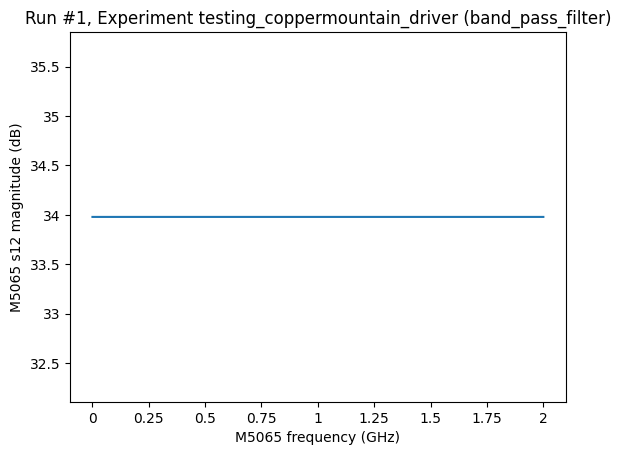

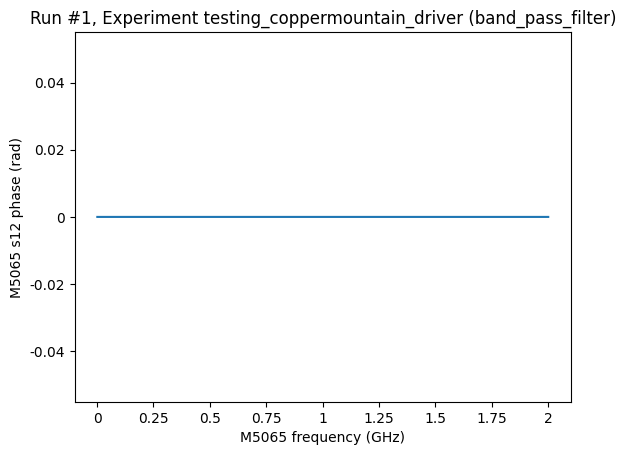

In [9]:
# define sweep parameters
vna.power(-20)
vna.start(1e6)
vna.stop(2e9)
vna.if_bandwidth(10e3)
vna.number_of_points(2001)
vna.averages(1)
# do measurement
meas = Measurement()
meas.register_parameter(vna.s12)
with meas.run() as datasaver:
    datasaver.add_result((vna.s12, vna.s12()))
ax, cbax = plot_by_id(datasaver.run_id)

In [10]:
# Similarly, other S-paramters can be queried
vna.s11()

(array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009], shape=(2001,)),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(2001,)))

In [11]:
vna.s12()

(array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009], shape=(2001,)),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(2001,)))

In [12]:
vna.s21()

(array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009], shape=(2001,)),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(2001,)))

In [13]:
vna.s22()

(array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009], shape=(2001,)),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(2001,)))

In [14]:
# or all S-parameters at once. Attention this is not a qcodes parameter
vna.get_s()

(array([1.0000000e+06, 1.9995000e+06, 2.9990000e+06, ..., 1.9980010e+09,
        1.9990005e+09, 2.0000000e+09], shape=(2001,)),
 array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009], shape=(2001,)),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(2001,)),
 array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009], shape=(2001,)),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(2001,)),
 array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009], shape=(2001,)),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(2001,)),
 array([33.97940009, 33.97940009, 33.97940009, ..., 33.97940009,
        33.97940009, 33.97940009], shape=(2001,)),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(2001,)))

# Look at the names and the labels of the Sxx parameters

In [15]:
vna.s11.labels

('M5065 s11 magnitude', 'M5065 s11 phase')

In [16]:
vna.s11.names

('M5065_s11_magnitude', 'M5065_s11_phase')

In [17]:
vna.s11.setpoint_labels

(('M5065 frequency',), ('M5065 frequency',))

In [18]:
vna.s11.setpoint_names

(('M5065_frequency',), ('M5065_frequency',))

### Close the Connection

In [19]:
vna.close()